### Jupyter Notebook for section 3.3
This notebook looks at record label representation

In [3]:
import pandas as pd
import numpy as np
import os, re
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from analysis_utils import CR2, gini

In [4]:
unique_tracks = pd.read_csv('../spotify_data/all_unique_track.csv')
all_tracks = pd.read_csv('../spotify_data/all_tracks_with_labels.csv')

In [5]:
label_list = unique_tracks[['album_label']]
print((len(label_list[label_list['album_label'].isna()])/len(label_list)) * 100, '% labels missing')

2.567945643485212 % labels missing


In [6]:
def get_label_count(tracks):
    label_dict = {}
    for i in range(0,len(tracks)):
        label = tracks.iloc[i,0]
        if label is np.nan: continue
        labels = label.split('/')
        for label in labels:
            label_dict[label] = label_dict.get(label, 0) + 1

    labels_unique = pd.DataFrame.from_dict(label_dict, orient = 'index').reset_index()
    labels_unique.columns = ['label', 'count']
    
    return labels_unique

In [7]:
# function to calculate top 2 concentration ratio. input df with labels
def CR2(tracks):
    label_dict = {}
    is_na = 0
    for i in range(0,len(tracks)):
        label = tracks.iloc[i,0]
        if label is np.nan:
            is_na += 1
            continue
        labels = label.split('/')
        for label in labels:
            label_dict[label] = label_dict.get(label, 0) + 1

    labels = pd.DataFrame.from_dict(label_dict, orient = 'index').reset_index()
    labels.columns = ['label', 'count']
    labels = labels.sort_values(by=['count'], ascending=False)
    total = len(tracks) - is_na
    l1 = labels.iloc[0,1]
    l2 = labels.iloc[1,1]
    
    return (l1+l2)/total

In [8]:
all_tracks = all_tracks.replace({'RCA Records Label': 'RCA Records'})
all_tracks = all_tracks.replace({'WALT DISNEY RECORDS': 'Walt Disney Records'})
unique_tracks = unique_tracks.replace({'RCA Records Label': 'RCA Records'})

In [9]:
print('CR2 for all tracks: ', CR2(all_tracks[['label']])*100)

CR2 for all tracks:  7.46276976245111


In [10]:
print('CR2 for unique tracks: ', CR2(unique_tracks[['album_label']])*100)

CR2 for unique tracks:  6.5736847502820215


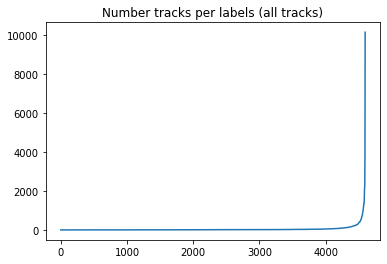

In [11]:
all_array = np.asarray(get_label_count(all_tracks[['label']])['count'])
all_array.sort()
plt.title('Number tracks per labels (all tracks)')
plt.plot(all_array)
plt.savefig('.png')

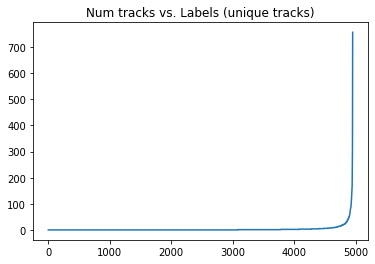

In [12]:
unique_array = np.asarray(get_label_count(unique_tracks[['album_label']])['count'])
unique_array.sort()
plt.title('Num tracks vs. Labels (unique tracks)')
plt.plot(unique_array)

### By Class

In [13]:
scl = all_tracks[all_tracks['playlist_type']=='s']
print('CR2 for SCL tracks: ', CR2(scl[['label']])*100)

CR2 for SCL tracks:  5.989327682901937


In [31]:
ucl = all_tracks[all_tracks['playlist_type']== 'u']
print('CR2 for UCL tracks: ', CR2(ucl[['label']])*100)

CR2 for UCL tracks:  9.648662354647284


In [40]:
print('Gini for SCL: ', gini(np.asarray(get_label_count(scl[['label']])['count'])))

Gini for SCL:  0.7306917003955271


In [16]:
print('Gini for UCL: ', gini(np.asarray(get_label_count(ucl[['label']])['count'])))

Gini for UCL:  0.8083117829069344


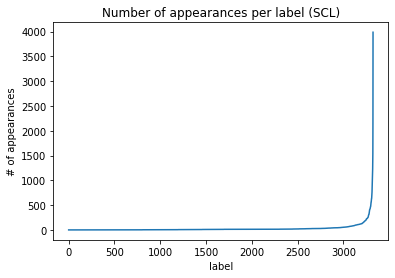

In [15]:
scl_array = np.asarray(get_label_count(scl[['label']])['count'])
scl_array.sort()
plt.title('Number of appearances per label (SCL)')
plt.plot(scl_array)
plt.xlabel('label')
plt.ylabel('# of appearances')
plt.savefig('num_label_SCL.png')

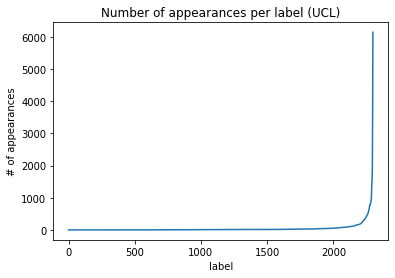

In [17]:
ucl_array = np.asarray(get_label_count(ucl[['label']])['count'])
ucl_array.sort()
plt.title('Number of appearances per label (UCL)')
plt.plot(ucl_array)
plt.xlabel('label')
plt.ylabel('# of appearances')
plt.savefig('num_label_UCL.png')

### Across Spotify as a whole

In [36]:
print('Gini for all tracks: ', gini(np.asarray(get_label_count(all_tracks[['label']])['count'])))

Gini for all tracks:  0.8061446293944039


In [28]:
print('CR2 for all tracks: ', CR2(all_tracks[['label']])*100)

CR2 for all tracks:  7.46276976245111


### Label Gini Coefficients

In [18]:
unique_lists = scl['playlist_name'].unique()
names = []
gini_coefs = []
cr2 = []
for playlist in unique_lists:
    names.append(playlist)
    tracks = scl[scl['playlist_name']==playlist]
    counts = get_label_count(tracks[['label']])
    gini_coefs.append(gini(np.asarray(counts['count'])))
    top_2 = counts.sort_values(by=['count'], ascending=False).head(2)
    l1 = top_2.iloc[0,1]
    l2 = top_2.iloc[1,1]
    cr2.append((l1+l2)/counts['count'].sum())
                      
list_labels_scl = pd.DataFrame()
list_labels_scl['playlist_name'] = names
list_labels_scl['gini'] = gini_coefs
list_labels_scl['cr2'] = cr2

In [19]:
unique_lists = ucl['playlist_name'].unique()
names = []
gini_coefs = []
cr2 = []
for playlist in unique_lists:
    names.append(playlist)
    tracks = ucl[ucl['playlist_name']==playlist]
    counts = get_label_count(tracks[['label']])
    gini_coefs.append(gini(np.asarray(counts['count'])))
    top_2 = counts.sort_values(by=['count'], ascending=False).head(2)
    l1 = top_2.iloc[0,1]
    l2 = top_2.iloc[1,1]
    cr2.append((l1+l2)/counts['count'].sum())
                      
list_labels_ucl = pd.DataFrame()
list_labels_ucl['playlist_name'] = names
list_labels_ucl['gini'] = gini_coefs
list_labels_ucl['cr2'] = cr2

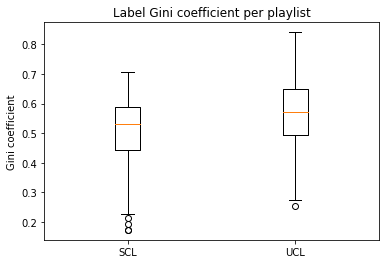

In [20]:
fig, ax = plt.subplots()
ax.set_title('Label Gini coefficient per playlist')
ax.boxplot([np.asarray(list_labels_scl['gini']), np.asarray(list_labels_ucl['gini'])])
ax.set_xticklabels(['SCL', 'UCL'])
plt.ylabel('Gini coefficient')
plt.savefig('gini_label_boxplot.png')

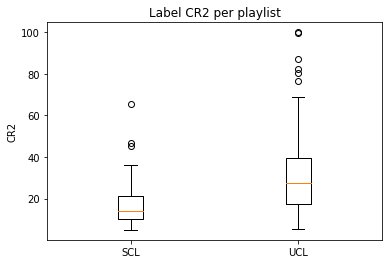

In [22]:
fig, ax = plt.subplots()
ax.set_title('Label CR2 per playlist')
ax.boxplot([np.asarray(list_labels_scl['cr2']*100), np.asarray(list_labels_ucl['cr2']*100)])
ax.set_xticklabels(['SCL', 'UCL'])
plt.ylabel('CR2')
plt.savefig('cr2_label_boxplot.png')

In [23]:
unique_lists = scl['playlist_name'].unique()
names = []
gini_coefs = []
cr2 = []
top_labels = []
for playlist in unique_lists:
    top_2_labels = []
    names.append(playlist)
    tracks = scl[scl['playlist_name']==playlist]
    counts = get_label_count(tracks[['label']])
    gini_coefs.append(gini(np.asarray(counts['count'])))
    top_2 = counts.sort_values(by=['count'], ascending=False).head(2)
    l1 = top_2.iloc[0,1]
    l2 = top_2.iloc[1,1]
    cr2.append((l1+l2)/counts['count'].sum())
    l1 = top_2.iloc[0,0]
    l2 = top_2.iloc[1,0]
    top_2_labels.append(l1)
    top_2_labels.append(l2)
    top_labels.append(top_2_labels)
                      
list_labels_scl = pd.DataFrame()
list_labels_scl['playlist_name'] = names
list_labels_scl['gini'] = gini_coefs
list_labels_scl['cr2'] = cr2
list_labels_scl['top_2'] = top_labels

In [24]:
list_labels_scl.sort_values(by=['cr2'], ascending=False)

,playlist_name,gini,cr2,top_2
42,Esquenta_Sertanejo,0.650641,0.655034,"[Som Livre, Sony Music Entertainment]"
50,Pop_Brasil,0.689503,0.468750,"[Universal Music International Ltda., WM Brazil]"
54,Funk_Hits,0.603184,0.452794,"[WM Brazil, GR6 MUSIC]"
29,Top_Brasil,0.668295,0.361222,"[WM Brazil, Som Livre]"
72,Baladas_Románticas,0.707233,0.331143,"[Columbia, Sony Music Latin]"
...,...,...,...,...
33,Dance_Rewind,0.505781,0.067833,"[Ultra Records, LLC, Now! Music]"
19,Good_Vibes,0.215165,0.065979,"[Columbia, RCA Records]"
12,Beast_Mode,0.463601,0.055435,"[Reach Records, Spinnin' Records]"
68,The_Most_Beautiful_Songs_in_the_World,0.173369,0.051661,"[Columbia, Secret City Records]"


In [25]:
list_labels_scl.describe()

,gini,cr2
count,74.000000,74.000000
mean,0.504048,0.173081
std,0.131049,0.105795
min,0.173369,0.049398
25%,0.443945,0.100984
50%,0.529876,0.141805
75%,0.589464,0.213750
max,0.707233,0.655034


In [26]:
list_labels_ucl.describe()

,gini,cr2
count,74.000000,74.000000
mean,0.573123,0.324499
std,0.125110,0.217574
min,0.252869,0.056075
25%,0.494961,0.175099
50%,0.571696,0.275987
75%,0.648425,0.395351
max,0.841065,1.000000
